In [1]:
import os

In [2]:
os.getcwd()

'F:\\Learning datascience\\Python Project'

In [3]:
os.chdir('F:\Capstone Project\Prem sir')

In [4]:
import pandas as pd

In [5]:
fan_train=pd.read_csv('acq_data_merged_q1mod.csv',sep=',',header=0,encoding='latin')

In [6]:
fan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436347 entries, 0 to 436346
Data columns (total 21 columns):
LOAN IDENTIFIER                           436347 non-null float64
ORIGINATION CHANNEL                       436347 non-null object
SELLER NAME                               436347 non-null object
ORIGINAL INTEREST RATE                    436347 non-null float64
ORIGINAL UPB                              436347 non-null int64
ORIGINAL LOAN TERM                        436347 non-null int64
ORIGINATION DATE                          436347 non-null object
FIRST PAYMENT DATE                        436347 non-null object
ORIGINAL LOAN-TO-VALUE (LTV)              436347 non-null int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    436347 non-null int64
ORIGINAL DEBT TO INCOME RATIO             436244 non-null float64
BORROWER CREDIT SCORE AT ORIGINATION      436192 non-null float64
FIRST TIME HOME BUYER INDICATOR           436347 non-null object
LOAN PURPOSE                              43

In [7]:
fan_train.rename(columns={'Default_status1':'Default Status'},inplace=True)

In [8]:
fan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436347 entries, 0 to 436346
Data columns (total 21 columns):
LOAN IDENTIFIER                           436347 non-null float64
ORIGINATION CHANNEL                       436347 non-null object
SELLER NAME                               436347 non-null object
ORIGINAL INTEREST RATE                    436347 non-null float64
ORIGINAL UPB                              436347 non-null int64
ORIGINAL LOAN TERM                        436347 non-null int64
ORIGINATION DATE                          436347 non-null object
FIRST PAYMENT DATE                        436347 non-null object
ORIGINAL LOAN-TO-VALUE (LTV)              436347 non-null int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    436347 non-null int64
ORIGINAL DEBT TO INCOME RATIO             436244 non-null float64
BORROWER CREDIT SCORE AT ORIGINATION      436192 non-null float64
FIRST TIME HOME BUYER INDICATOR           436347 non-null object
LOAN PURPOSE                              43

In [9]:
fan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436347 entries, 0 to 436346
Data columns (total 21 columns):
LOAN IDENTIFIER                           436347 non-null float64
ORIGINATION CHANNEL                       436347 non-null object
SELLER NAME                               436347 non-null object
ORIGINAL INTEREST RATE                    436347 non-null float64
ORIGINAL UPB                              436347 non-null int64
ORIGINAL LOAN TERM                        436347 non-null int64
ORIGINATION DATE                          436347 non-null object
FIRST PAYMENT DATE                        436347 non-null object
ORIGINAL LOAN-TO-VALUE (LTV)              436347 non-null int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    436347 non-null int64
ORIGINAL DEBT TO INCOME RATIO             436244 non-null float64
BORROWER CREDIT SCORE AT ORIGINATION      436192 non-null float64
FIRST TIME HOME BUYER INDICATOR           436347 non-null object
LOAN PURPOSE                              43

Categorial Variable analysis 

In [10]:
cate_v=fan_train.dtypes.loc[fan_train.dtypes=='object'].index
cate_v

Index(['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINATION DATE',
       'FIRST PAYMENT DATE', 'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE',
       'PROPERTY TYPE', 'OCCUPANCY TYPE', 'PROPERTY STATE', 'PRODUCT TYPE',
       'RELOCATION MORTGAGE INDICATOR'],
      dtype='object')

In [11]:
fan_train[cate_v].apply(lambda x: len(x.unique()))

ORIGINATION CHANNEL                 3
SELLER NAME                        16
ORIGINATION DATE                   27
FIRST PAYMENT DATE                 27
FIRST TIME HOME BUYER INDICATOR     2
LOAN PURPOSE                        3
PROPERTY TYPE                       5
OCCUPANCY TYPE                      3
PROPERTY STATE                     54
PRODUCT TYPE                        1
RELOCATION MORTGAGE INDICATOR       2
dtype: int64

AS product type has only one unique value ,so dropping the column doesn't have any impact on analysis
so dropping product type column

In [12]:
fan_train.drop(["PRODUCT TYPE"],axis=1,inplace=True)

In [13]:
fan_train.head(5)

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,RELOCATION MORTGAGE INDICATOR,Default Status
0,1.000020e+11,R,OTHER,4.125,345000,360,01-12-2014,01-02-2015,95,95,32.0,652.0,N,P,PU,1,P,NC,N,0
1,1.000040e+11,R,"WELLS FARGO BANK, N.A.",4.125,293000,312,01-12-2014,01-02-2015,77,77,34.0,732.0,N,R,PU,1,P,IL,N,0
2,1.000040e+11,C,"WELLS FARGO BANK, N.A.",3.875,304000,360,01-11-2014,01-01-2015,80,80,42.0,813.0,N,P,SF,1,P,GA,N,0
3,1.000070e+11,R,OTHER,4.375,110000,360,01-10-2014,01-12-2014,65,65,28.0,760.0,N,C,SF,1,P,VA,N,0
4,1.000090e+11,R,QUICKEN LOANS INC.,4.375,325000,348,01-01-2015,01-03-2015,72,72,29.0,734.0,N,R,SF,1,P,CA,N,0


In [14]:
fan_train['ORIGINATION CHANNEL'].value_counts()/fan_train.shape[0]

R    0.587746
C    0.300722
B    0.111533
Name: ORIGINATION CHANNEL, dtype: float64

In [15]:
fan_train['FIRST TIME HOME BUYER INDICATOR'].value_counts()/fan_train.shape[0]

N    0.837661
Y    0.162339
Name: FIRST TIME HOME BUYER INDICATOR, dtype: float64

In [16]:
fan_train['SELLER NAME'].value_counts()/fan_train.shape[0]

OTHER                                                                   0.554836
WELLS FARGO BANK, N.A.                                                  0.130786
QUICKEN LOANS INC.                                                      0.086929
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION                               0.037246
FLAGSTAR BANK, FSB                                                      0.026600
DITECH FINANCIAL LLC                                                    0.022736
FRANKLIN AMERICAN MORTGAGE COMPANY                                      0.018254
SUNTRUST MORTGAGE INC.                                                  0.017259
STEARNS LENDING, LLC                                                    0.016219
FREEDOM MORTGAGE CORP.                                                  0.016090
NATIONSTAR MORTGAGE, LLC                                                0.014752
CITIMORTGAGE, INC.                                                      0.014695
UNITED SHORE FINANCIAL SERVI

In [17]:
fan_train['LOAN PURPOSE'].value_counts()/fan_train.shape[0]

P    0.419845
R    0.356372
C    0.223783
Name: LOAN PURPOSE, dtype: float64

In [18]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [19]:
fan_train['OCCUPANCY TYPE'].value_counts()/fan_train.shape[0]

P    0.866118
I    0.094150
S    0.039732
Name: OCCUPANCY TYPE, dtype: float64

In [20]:
fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]

CA    0.192246
TX    0.078543
FL    0.052981
IL    0.042560
CO    0.036982
WA    0.031768
MI    0.030991
AZ    0.029312
NY    0.028658
PA    0.027125
VA    0.026594
NC    0.025489
GA    0.025335
NJ    0.025319
MA    0.023610
WI    0.023060
OH    0.022122
MN    0.021838
MD    0.019299
OR    0.018382
UT    0.017090
MO    0.016849
TN    0.015829
IN    0.015387
SC    0.013359
NV    0.012607
IA    0.010322
LA    0.010022
AL    0.009832
OK    0.008791
CT    0.007813
KY    0.007657
ID    0.007196
NE    0.006614
KS    0.005567
NM    0.005189
AR    0.004957
MS    0.004240
HI    0.003903
MT    0.003775
NH    0.003598
DE    0.003406
SD    0.003206
PR    0.002954
DC    0.002801
ND    0.002564
WY    0.002457
RI    0.002404
ME    0.002104
WV    0.002005
AK    0.001799
VT    0.001407
VI    0.000062
GU    0.000023
Name: PROPERTY STATE, dtype: float64

In [21]:
fan_train['RELOCATION MORTGAGE INDICATOR'].value_counts()/fan_train.shape[0]

N    0.994044
Y    0.005956
Name: RELOCATION MORTGAGE INDICATOR, dtype: float64

In [22]:
fan_train['Default Status'].value_counts()/fan_train.shape[0]

0    0.99254
1    0.00746
Name: Default Status, dtype: float64

 Continuous Variable

In [23]:
fan_train.describe()

,LOAN IDENTIFIER,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,NUMBER OF UNITS,Default Status
count,4.363470e+05,436347.000000,4.363470e+05,436347.000000,436347.000000,436347.000000,436244.000000,436192.000000,436347.000000,436347.000000
mean,5.506554e+11,3.997689,2.298115e+05,316.810039,74.038570,74.719739,33.323450,754.253356,1.035827,0.007460
std,2.594856e+11,0.478863,1.188393e+05,76.706949,16.293784,16.310479,8.902985,46.228860,0.257164,0.086047
min,1.000020e+11,2.250000,1.000000e+04,60.000000,3.000000,3.000000,1.000000,471.000000,1.000000,0.000000
25%,3.257770e+11,3.750000,1.370000e+05,300.000000,66.000000,67.000000,27.000000,723.000000,1.000000,0.000000
50%,5.514690e+11,4.000000,2.090000e+05,360.000000,78.000000,79.000000,34.000000,766.000000,1.000000,0.000000
75%,7.753805e+11,4.250000,3.060000e+05,360.000000,84.000000,85.000000,41.000000,792.000000,1.000000,0.000000
max,9.999960e+11,6.125000,1.203000e+06,360.000000,97.000000,107.000000,51.000000,839.000000,4.000000,1.000000


In [24]:
fan_train.plot('ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL LOAN TERM',kind='scatter')

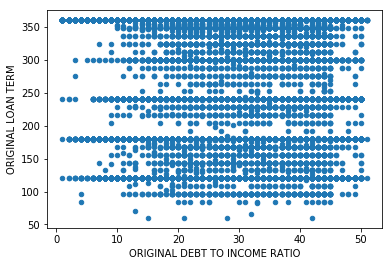

In [25]:
fan_train.plot('ORIGINAL DEBT TO INCOME RATIO','ORIGINAL LOAN TERM',kind='scatter')

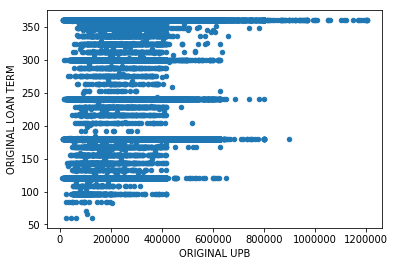

In [26]:
fan_train.plot('ORIGINAL UPB','ORIGINAL LOAN TERM',kind='scatter')

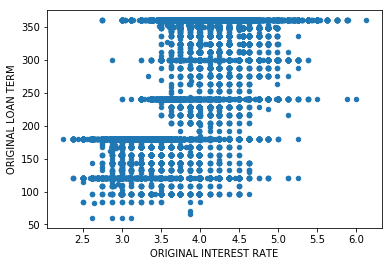

In [27]:
fan_train.plot('ORIGINAL INTEREST RATE','ORIGINAL LOAN TERM',kind='scatter')

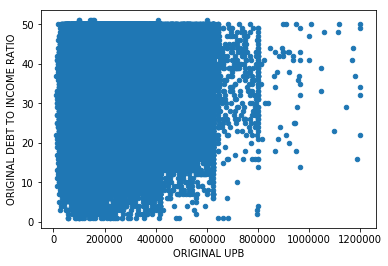

In [28]:
fan_train.plot('ORIGINAL UPB','ORIGINAL DEBT TO INCOME RATIO',kind='scatter')

In [1]:
ct=pd.crosstab(fan_train['PROPERTY TYPE'],fan_train.Default Status[fan_train.Default Status=='1'],margins=True)
ct

SyntaxError: invalid syntax (<ipython-input-1-059e197c54df>, line 1)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

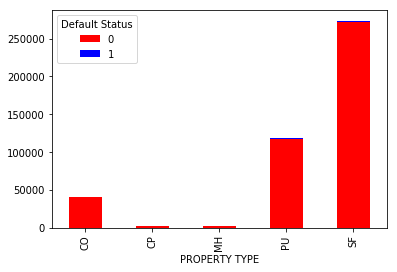

In [31]:
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

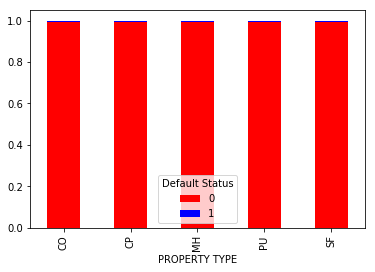

In [32]:
def percConvert(ser):
    return ser/float(ser[-1])
ctprop=ct.apply(percConvert,axis=1)
ctprop.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [33]:
ctfthb=pd.crosstab(fan_train['FIRST TIME HOME BUYER INDICATOR'],fan_train['Default Status'],margins=True)
ctfthb

Default Status,0,1,All
FIRST TIME HOME BUYER INDICATOR,,,
N,363115,2396,365511
Y,69977,859,70836
All,433092,3255,436347


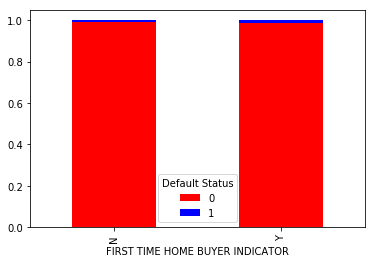

In [34]:
ctfthbp=ctfthb.apply(percConvert,axis=1)
ctfthbp.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [35]:
ctseller=pd.crosstab(fan_train['SELLER NAME'],fan_train['Default Status'],margins=True)
ctseller

Default Status,0,1,All
SELLER NAME,,,
"CITIMORTGAGE, INC.",6385,27,6412
DITECH FINANCIAL LLC,9835,86,9921
"FLAGSTAR BANK, FSB",11518,89,11607
FRANKLIN AMERICAN MORTGAGE COMPANY,7888,77,7965
FREEDOM MORTGAGE CORP.,6983,38,7021
IMPAC MORTGAGE CORP.,4528,17,4545
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",16168,84,16252
"LOANDEPOT.COM, LLC",4597,40,4637
"NATIONSTAR MORTGAGE, LLC",6383,54,6437


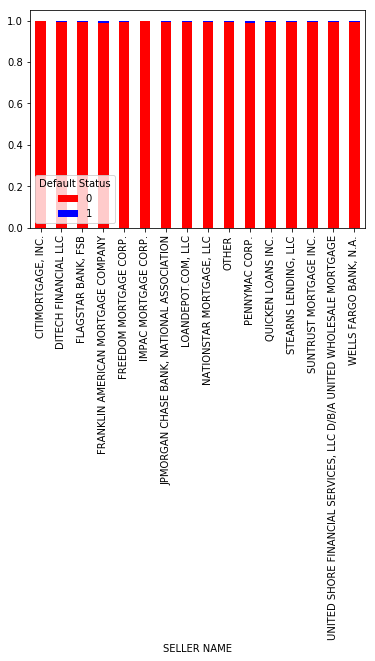

In [36]:
ctsellerp=ctseller.apply(percConvert,axis=1)
ctsellerp.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

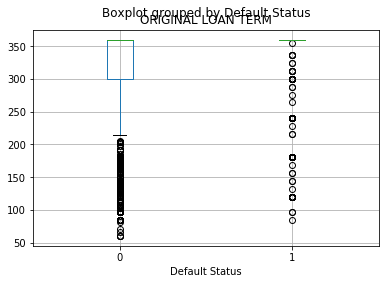

In [37]:
fan_train.boxplot(column='ORIGINAL LOAN TERM',by='Default Status')

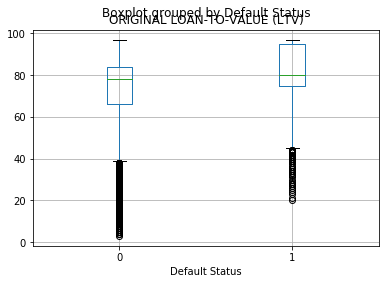

In [38]:
fan_train.boxplot(column='ORIGINAL LOAN-TO-VALUE (LTV)',by='Default Status')

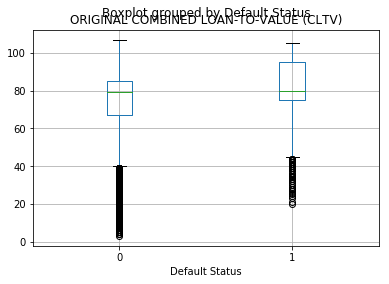

In [39]:
fan_train.boxplot(column='ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',by='Default Status')

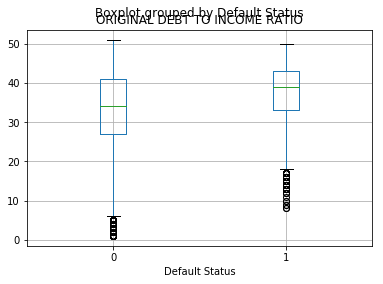

In [40]:
fan_train.boxplot(column='ORIGINAL DEBT TO INCOME RATIO',by='Default Status')

Missing Value Treatment 

In [41]:
fan_train.apply(lambda x: sum(x.isnull()))

LOAN IDENTIFIER                             0
ORIGINATION CHANNEL                         0
SELLER NAME                                 0
ORIGINAL INTEREST RATE                      0
ORIGINAL UPB                                0
ORIGINAL LOAN TERM                          0
ORIGINATION DATE                            0
FIRST PAYMENT DATE                          0
ORIGINAL LOAN-TO-VALUE (LTV)                0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)      0
ORIGINAL DEBT TO INCOME RATIO             103
BORROWER CREDIT SCORE AT ORIGINATION      155
FIRST TIME HOME BUYER INDICATOR             0
LOAN PURPOSE                                0
PROPERTY TYPE                               0
NUMBER OF UNITS                             0
OCCUPANCY TYPE                              0
PROPERTY STATE                              0
RELOCATION MORTGAGE INDICATOR               0
Default Status                              0
dtype: int64

In [42]:
Mean=fan_train['ORIGINAL DEBT TO INCOME RATIO'].mean()

In [43]:
fan_train['ORIGINAL DEBT TO INCOME RATIO'].median()

34.0

In [44]:
fan_train['ORIGINAL DEBT TO INCOME RATIO'].mode()

0    44.0
dtype: float64

In [45]:
fan_train['ORIGINAL DEBT TO INCOME RATIO']=fan_train['ORIGINAL DEBT TO INCOME RATIO'].fillna(Mean)

In [46]:
meanb=fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].mean()
meanb

754.2533563201526

In [47]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].median()

766.0

In [48]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].mode()

0    801.0
dtype: float64

In [49]:
fan_train['BORROWER CREDIT SCORE AT ORIGINATION']=fan_train['BORROWER CREDIT SCORE AT ORIGINATION'].fillna(meanb)

In [50]:
fan_train.apply(lambda x: sum(x.isnull()))

LOAN IDENTIFIER                           0
ORIGINATION CHANNEL                       0
SELLER NAME                               0
ORIGINAL INTEREST RATE                    0
ORIGINAL UPB                              0
ORIGINAL LOAN TERM                        0
ORIGINATION DATE                          0
FIRST PAYMENT DATE                        0
ORIGINAL LOAN-TO-VALUE (LTV)              0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    0
ORIGINAL DEBT TO INCOME RATIO             0
BORROWER CREDIT SCORE AT ORIGINATION      0
FIRST TIME HOME BUYER INDICATOR           0
LOAN PURPOSE                              0
PROPERTY TYPE                             0
NUMBER OF UNITS                           0
OCCUPANCY TYPE                            0
PROPERTY STATE                            0
RELOCATION MORTGAGE INDICATOR             0
Default Status                            0
dtype: int64

Outlier treatment

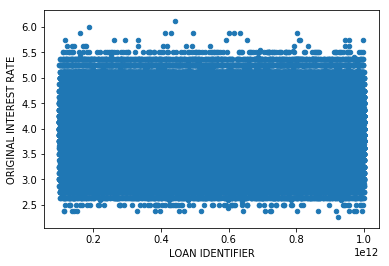

In [51]:
fan_train.plot('LOAN IDENTIFIER','ORIGINAL INTEREST RATE',kind='scatter')

few loan identifier having interest rate more than 5.5 percent

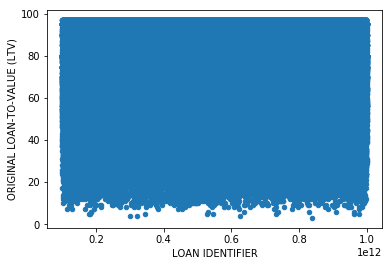

In [52]:
fan_train.plot('LOAN IDENTIFIER','ORIGINAL LOAN-TO-VALUE (LTV)',kind='scatter')

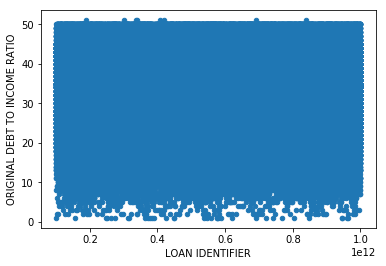

In [53]:
fan_train.plot('LOAN IDENTIFIER','ORIGINAL DEBT TO INCOME RATIO',kind='scatter')

Variable Transformation

In [54]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [55]:
categories_comb= ['Others','MH and CP']

In [56]:
for cat in categories_comb:
    fan_train['PROPERTY TYPE'].replace({cat:'Others'},inplace=True)

In [57]:
fan_train['PROPERTY TYPE'].value_counts()/fan_train.shape[0]

SF    0.627480
PU    0.270998
CO    0.092202
MH    0.005058
CP    0.004263
Name: PROPERTY TYPE, dtype: float64

In [58]:
frq=fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]
frq

CA    0.192246
TX    0.078543
FL    0.052981
IL    0.042560
CO    0.036982
WA    0.031768
MI    0.030991
AZ    0.029312
NY    0.028658
PA    0.027125
VA    0.026594
NC    0.025489
GA    0.025335
NJ    0.025319
MA    0.023610
WI    0.023060
OH    0.022122
MN    0.021838
MD    0.019299
OR    0.018382
UT    0.017090
MO    0.016849
TN    0.015829
IN    0.015387
SC    0.013359
NV    0.012607
IA    0.010322
LA    0.010022
AL    0.009832
OK    0.008791
CT    0.007813
KY    0.007657
ID    0.007196
NE    0.006614
KS    0.005567
NM    0.005189
AR    0.004957
MS    0.004240
HI    0.003903
MT    0.003775
NH    0.003598
DE    0.003406
SD    0.003206
PR    0.002954
DC    0.002801
ND    0.002564
WY    0.002457
RI    0.002404
ME    0.002104
WV    0.002005
AK    0.001799
VT    0.001407
VI    0.000062
GU    0.000023
Name: PROPERTY STATE, dtype: float64

In [59]:
cate_prop_state=frq.loc[frq.values<.025].index

for cat in cate_prop_state:
    fan_train['PROPERTY STATE'].replace({cat:'other states'},inplace=True)

In [60]:
fan_train['PROPERTY STATE'].value_counts()/fan_train.shape[0]

other states    0.346096
CA              0.192246
TX              0.078543
FL              0.052981
IL              0.042560
CO              0.036982
WA              0.031768
MI              0.030991
AZ              0.029312
NY              0.028658
PA              0.027125
VA              0.026594
NC              0.025489
GA              0.025335
NJ              0.025319
Name: PROPERTY STATE, dtype: float64

Predictive Modelling using Decision Tree Model

Data Preprocessing

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
cate_v=fan_train.dtypes.loc[fan_train.dtypes=='object'].index
cate_v

Index(['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINATION DATE',
       'FIRST PAYMENT DATE', 'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE',
       'PROPERTY TYPE', 'OCCUPANCY TYPE', 'PROPERTY STATE',
       'RELOCATION MORTGAGE INDICATOR'],
      dtype='object')

In [63]:
le= LabelEncoder()
for var in cate_v:
    fan_train[var]=le.fit_transform(fan_train[var])

In [64]:
fan_train.dtypes

LOAN IDENTIFIER                           float64
ORIGINATION CHANNEL                         int64
SELLER NAME                                 int64
ORIGINAL INTEREST RATE                    float64
ORIGINAL UPB                                int64
ORIGINAL LOAN TERM                          int64
ORIGINATION DATE                            int64
FIRST PAYMENT DATE                          int64
ORIGINAL LOAN-TO-VALUE (LTV)                int64
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)      int64
ORIGINAL DEBT TO INCOME RATIO             float64
BORROWER CREDIT SCORE AT ORIGINATION      float64
FIRST TIME HOME BUYER INDICATOR             int64
LOAN PURPOSE                                int64
PROPERTY TYPE                               int64
NUMBER OF UNITS                             int64
OCCUPANCY TYPE                              int64
PROPERTY STATE                              int64
RELOCATION MORTGAGE INDICATOR               int64
Default Status                              int64


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dependent_variable='Default Status'
independent_variable=[x for x in fan_train.columns if x not in ['LOAN IDENTIFIER',dependent_variable]]
print (independent_variable)

['ORIGINATION CHANNEL', 'SELLER NAME', 'ORIGINAL INTEREST RATE', 'ORIGINAL UPB', 'ORIGINAL LOAN TERM', 'ORIGINATION DATE', 'FIRST PAYMENT DATE', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'ORIGINAL DEBT TO INCOME RATIO', 'BORROWER CREDIT SCORE AT ORIGINATION', 'FIRST TIME HOME BUYER INDICATOR', 'LOAN PURPOSE', 'PROPERTY TYPE', 'NUMBER OF UNITS', 'OCCUPANCY TYPE', 'PROPERTY STATE', 'RELOCATION MORTGAGE INDICATOR']


max_depth=18
main_samples=24242
max_features='sqrt'

In [79]:
#initialize the algorithm
model1= DecisionTreeClassifier(max_depth=18,min_samples_leaf=24242,max_features='sqrt')

#fit the algorithm
model1.fit(fan_train[independent_variable],fan_train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=24242, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

MAKE PREDICTION

In [80]:
predict_fantrain=model1.predict(fan_train[independent_variable])

Analyse Result

Evaluate fan_train accuracy using the confusion matrix

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
#Determine the train error
acc_fan_train= accuracy_score(fan_train[dependent_variable],predict_fantrain)

In [83]:
print ('Train Accuracy: %f'%acc_fan_train)

Train Accuracy: 0.992540
